**Changed batch size to 128 and learning rate to 0.005 with Adam optimizer.**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam

from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


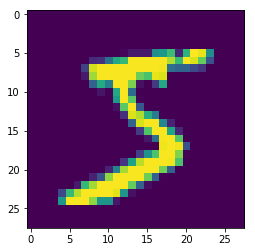

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(10, 3, activation='relu', use_bias=False, input_shape=(28,28,1))) # 3 26
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(Convolution2D(16, 3, activation='relu', use_bias=False)) # 5 24
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(Convolution2D(16, 3, activation='relu', use_bias=False)) # 7 22
model.add(Dropout(0.1))
model.add(BatchNormalization()) 
model.add(Convolution2D(10, 1, activation='relu', use_bias=False)) 
model.add(MaxPooling2D(pool_size=(2,2))) # 14 11
model.add(BatchNormalization())
model.add(Convolution2D(16, 3, activation='relu', use_bias=False)) # 16 9
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(Convolution2D(16, 3, activation='relu', use_bias=False)) # 18 7
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(Convolution2D(16, 3, activation='relu', use_bias=False)) # 20 5
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(Convolution2D(10, 5, use_bias=False)) 
model.add(Flatten())
model.add(Activation('softmax'))

In [53]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_87 (Conv2D)           (None, 26, 26, 10)        90        
_________________________________________________________________
dropout_7 (Dropout)          (None, 26, 26, 10)        0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 26, 26, 10)        40        
_________________________________________________________________
conv2d_88 (Conv2D)           (None, 24, 24, 16)        1440      
_________________________________________________________________
dropout_8 (Dropout)          (None, 24, 24, 16)        0         
_________________________________________________________________
batch_normalization_15 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
conv2d_89 (Conv2D)           (None, 22, 22, 16)        2304      
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer=Adam(lr=0.005),
             metrics=['accuracy'])

In [55]:
model.fit(X_train, Y_train, batch_size=128, nb_epoch=50, validation_data=(X_test, Y_test), verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 9s 152us/step - loss: 0.1605 - acc: 0.9494 - val_loss: 0.0518 - val_acc: 0.9839
Epoch 2/50
60000/60000 [==============================] - 7s 111us/step - loss: 0.0647 - acc: 0.9798 - val_loss: 0.0420 - val_acc: 0.9863
Epoch 3/50
60000/60000 [==============================] - 7s 112us/step - loss: 0.0505 - acc: 0.9843 - val_loss: 0.0395 - val_acc: 0.9878
Epoch 4/50
60000/60000 [==============================] - 7s 111us/step - loss: 0.0469 - acc: 0.9846 - val_loss: 0.0276 - val_acc: 0.9916
Epoch 5/50
60000/60000 [==============================] - 7s 111us/step - loss: 0.0390 - acc: 0.9878 - val_loss: 0.0298 - val_acc: 0.9901
Epoch 6/50
60000/60000 [==============================] - 7s 112us/step - loss: 0.0375 - acc: 0.9880 - val_loss: 0.0280 - val_acc: 0.9912
Epoch 7/50
60000/60000 [==============================] - 7s 112us/step - loss: 0.0356 - acc: 0.9890 - val_loss: 0.0299 - 

KeyboardInterrupt: ignored

**Reached 99.48% validation accuracy in 35 epochs by increasing batch size and learning rate over second DNN**

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [57]:
print(score)

[0.020867813989976277, 0.9931]


In [0]:
y_pred = model.predict(X_test)

In [36]:
print(y_pred[:9])
print(y_test[:9])

[[9.5527419e-30 1.5806463e-27 5.5409773e-20 2.7290299e-19 1.2212528e-33
  3.2647520e-26 0.0000000e+00 1.0000000e+00 3.1491501e-23 2.7263960e-20]
 [1.9396376e-17 1.2235541e-14 1.0000000e+00 4.3086357e-29 8.6155020e-25
  4.8925735e-31 2.5011543e-14 5.4405806e-30 2.6716553e-19 2.0066111e-34]
 [3.8349295e-14 1.0000000e+00 1.8023840e-17 1.5602775e-20 4.8813303e-13
  1.0072353e-16 4.1420081e-15 1.0628366e-12 6.1924386e-13 6.4359734e-17]
 [1.0000000e+00 5.3432160e-21 3.8831107e-14 9.0368432e-21 4.3086394e-20
  2.6362765e-16 4.9567723e-13 1.4595142e-18 6.7195430e-18 6.9608422e-14]
 [7.5458683e-22 3.1454975e-17 2.9391163e-24 7.1163250e-29 1.0000000e+00
  1.4182579e-24 2.6143927e-17 3.2638945e-25 2.8092026e-17 1.9260318e-12]
 [3.6917701e-16 1.0000000e+00 1.4577010e-17 1.3754680e-23 6.7645711e-12
  2.6157853e-20 1.1498381e-16 2.7970053e-11 8.5242317e-13 1.0888401e-16]
 [9.7193409e-35 8.9534712e-19 1.6528574e-24 1.5837289e-29 1.0000000e+00
  1.1582740e-22 2.5813209e-34 3.8586001e-21 2.0034104e-15 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [38]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored